# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()


,price,age,from station,number of convenience stores
count,414.000000,414.000000,414.000000,414.000000
mean,37.980193,17.712560,1083.885689,4.094203
std,13.606488,11.392485,1262.109595,2.945562
min,7.600000,0.000000,23.382840,0.000000
25%,27.700000,9.025000,289.324800,1.000000
50%,38.450000,16.100000,492.231300,4.000000
75%,46.600000,28.150000,1454.279000,6.000000
max,117.500000,43.800000,6488.021000,10.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'price': 3, 'age': 3, 'from station': 6, 'number of convenience stores': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,price,age,from station,number of convenience stores
mean,37.98,17.713,1083.885689,4.094
median,38.45,16.100,492.231300,4.000
mode,24.70,0.000,289.324800,0.000


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'price': 3, 'age': 3, 'from station': 6, 'number of convenience stores': 3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,price,age,from station,number of convenience stores
st.dev.,13.59,11.379,1260.584387,2.942
min,7.60,0.000,23.382840,0.000
max,117.50,43.800,6488.021000,10.000
range,109.90,43.800,6464.638160,10.000
25th,27.70,9.025,289.324800,1.000
75th,46.60,28.150,1454.279000,6.000
IQR,18.90,19.125,1164.954200,5.000


Let's save the variables in easier-to-use variable names:

In [6]:
y  = df['price']
age  = df['age']
frst = df['from station']
nmcv = df['number of convenience stores']

Let's create scatterplots for the DV (price) vs. each of the three IVs (age, from station, number of convenience stores):

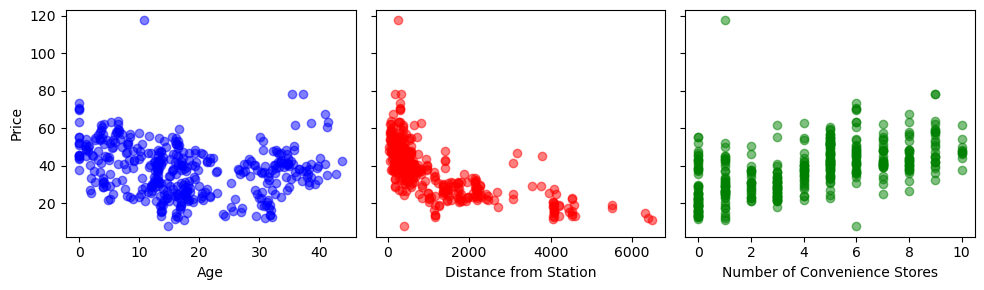

In [7]:

fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( age, y, alpha=0.5, color='b' )
axs[1].scatter( frst, y, alpha=0.5, color='r' )
axs[2].scatter( nmcv, y, alpha=0.5, color='g' )

xlabels = 'Age', 'Distance from Station', 'Number of Convenience Stores' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Price')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The distance from station xtick values are difficult to reach so let's make them easier to read:

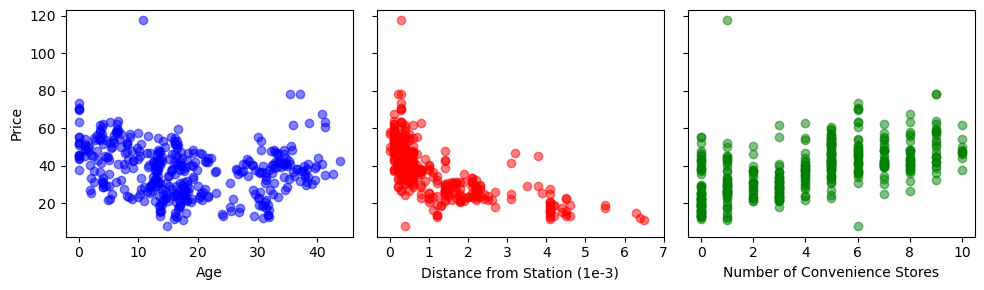

In [8]:
frst1 = np.around(frst/1000, 1)  # transformed density value

fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( age, y, alpha=0.5, color='b' )
axs[1].scatter( frst1, y, alpha=0.5, color='r' )
axs[2].scatter( nmcv, y, alpha=0.5, color='g' )

xlabels = 'Age', 'Distance from Station (1e-3)', 'Number of Convenience Stores' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[1].set_xticks([0,1,2,3,4,5,6,7])
axs[0].set_ylabel('Price')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [9]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


The correlation coefficient of distance from station is significantly low, suggesting slight negative linear correlation between the DV and diastance from station. 

The correlation coefficient of the number of convenience stores is significantly high, suggesting slight positive linear correlation between the DV and the number of convenience stores.


However, in the age data (left panel above) it appears that there may be opposite trends for low-age houses (age <= 25) and high-age houses (age > 25).  Let's plot price vs. age separately for the low- and high-age groups, along with linear regression trends.

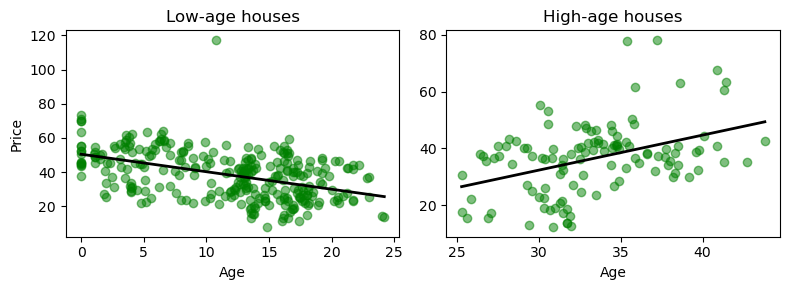

In [10]:
i_low     = age <= 25
i_high    = age > 25

fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
i       = [age]
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( age[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, age[i], y[i], color='k', ls='-', lw=2)
[ax.set_xlabel('Age')  for ax in axs] 
axs[0].set_title('Low-age houses')
axs[0].set_ylabel('Price')
axs[1].set_title('High-age houses')
plt.show()

The linear trend lines in the figures above appear to be opposite to the visual patterns:

- Price appears to increase with age in low-age houses
- Price appears to descrease with sugar in low-age houses

Linear regression suggests that the average pattern is opposite. To see why let's highlight the average for each house age.

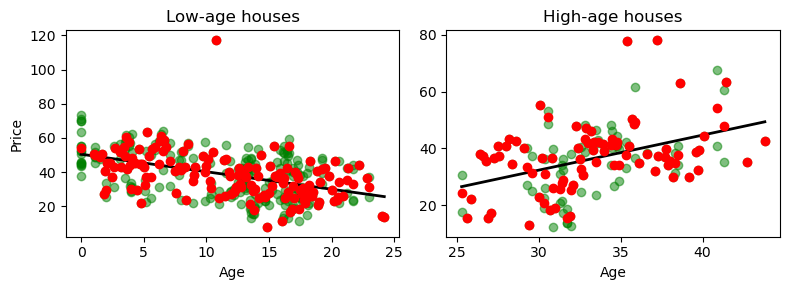

In [11]:
fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( age[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, age[i], y[i], color='k', ls='-', lw=2)
for a in np.unique(age[i_low]):
    mean_price_low = y[i_low][age[i_low] == a].mean() 
    axs[0].plot(a, mean_price_low, 'ro')
for a in np.unique(age[i_high]):
    mean_price_high = y[i_high][age[i_high] == a].mean()
    axs[1].plot(a, mean_price_high, 'ro')
[ax.set_xlabel('Age')  for ax in axs] 
axs[0].set_title('Low-age houses')
axs[0].set_ylabel('Price')
axs[1].set_title('High-age houses')
plt.show()

These analyses show that the trends associated with just the means are unclear.

Let's now assemble all results into a single figure for reporting purposes:

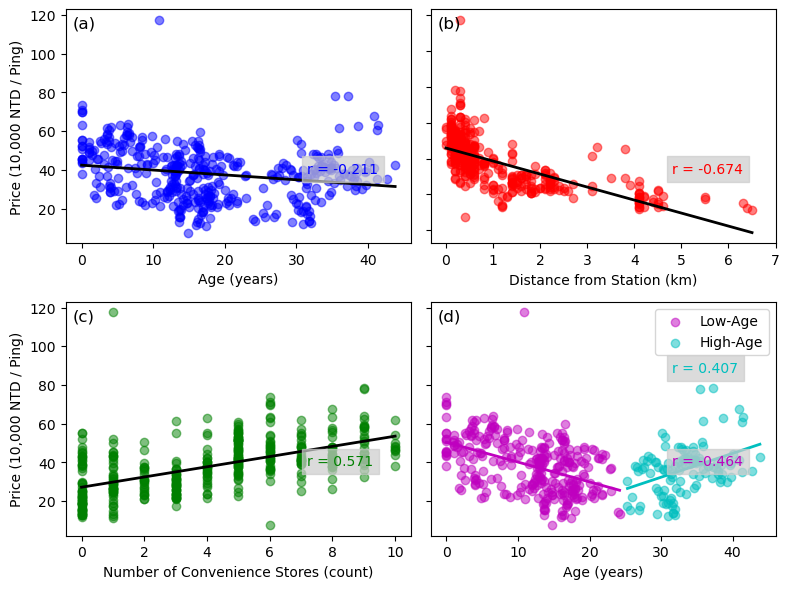

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [14]:
def plot_descriptive():

    fig,axs = plt.subplots( 2, 2, figsize=(8,6), tight_layout=True )
    ivs     = [age, frst1, nmcv]
    colors  = 'b', 'r', 'g'
    for ax,x,c in zip(axs.ravel(), ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))
    
    xlabels = 'Age (years)', 'Distance from Station (km)', 'Number of Convenience Stores (count)' 
    [ax.set_xlabel(s) for ax,s in zip(axs.ravel(),xlabels)]
    axs[0,1].set_xticks([0,1,2,3,4,5,6,7])
    [ax.set_ylabel('Price (10,000 NTD / Ping)') for ax in axs[:,0]]
    [ax.set_yticklabels([]) for ax in axs[:,1]]


    ax       = axs[1,1]
    i_low    = age <= 25
    i_high   = age > 25
    fcolors  = 'm', 'c'
    labels   = 'Low-Age', 'High-Age'
    ylocs    = 0.3, 0.7
    for i,c,s,yloc in zip([i_low, i_high], fcolors, labels, ylocs):
        ax.scatter( age[i], y[i], alpha=0.5, color=c, facecolor=c, label=s )
        plot_regression_line(ax, age[i], y[i], color=c, ls='-', lw=2)
        r   = corrcoeff(age[i], y[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('Age (years)')

    panel_labels = 'a', 'b', 'c', 'd'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes)  for ax,s in zip(axs.ravel(), panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()